In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [216]:
train = pd.read_csv('titanic_train.csv')

In [217]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

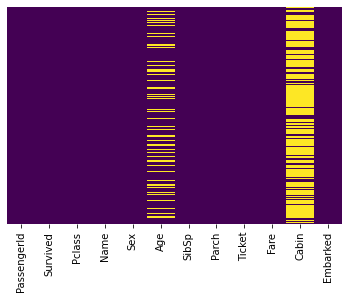

In [218]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

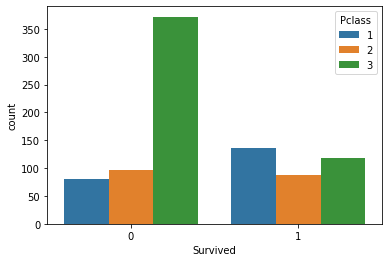

In [219]:
sns.countplot(x='Survived',hue='Pclass',data=train)

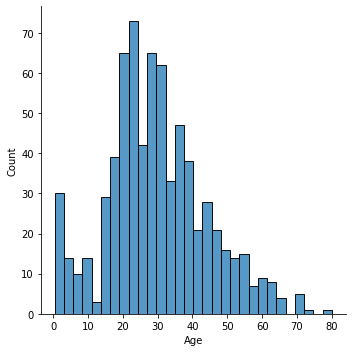

In [220]:
sns.displot(train['Age'].dropna(),bins=30)

<AxesSubplot:ylabel='Frequency'>

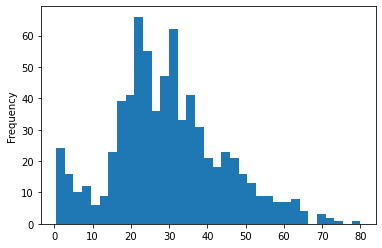

In [221]:
train['Age'].dropna().plot.hist(bins=35)

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

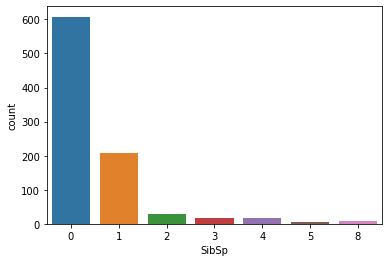

In [223]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

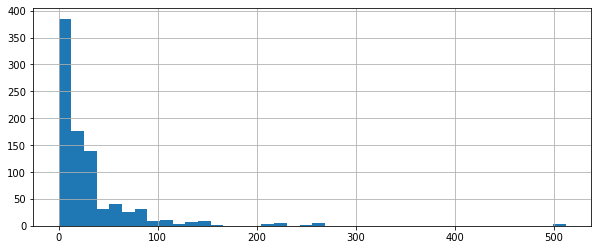

In [224]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [225]:
import cufflinks as cf

In [226]:
# cf.go_offline() => ?
train['Fare'].iplot(kind='hist',bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

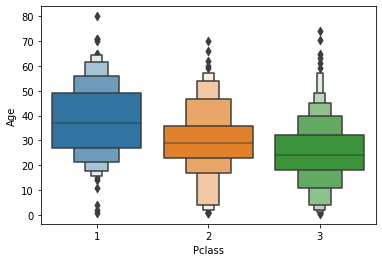

In [227]:
sns.boxenplot(x='Pclass',y='Age',data=train)

In [228]:
firstClassMean = np.round(train[train['Pclass'] == 1]['Age'].dropna().mean())
secondClassMean = np.round(train[train['Pclass'] == 2]['Age'].dropna().mean())
thirdClassMean = np.round(train[train['Pclass'] == 3]['Age'].dropna().mean())
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]    
    if pd.isnull(age):
        if pclass == 1:
            return firstClassMean
        elif pclass == 2:
            return secondClassMean
        else:
            return thirdClassMean
    else:
        return age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [229]:
train['Age'].isnull().value_counts()

False    891
Name: Age, dtype: int64

<AxesSubplot:>

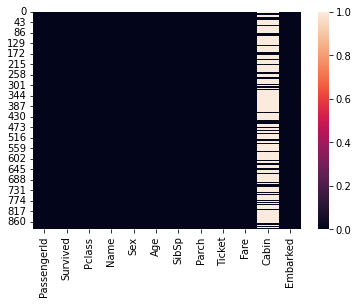

In [230]:
sns.heatmap(train.isnull())

In [231]:
 train.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

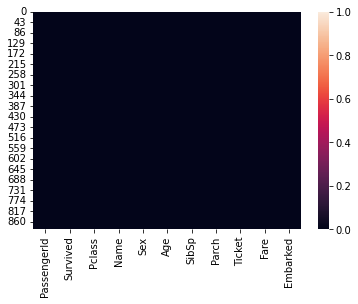

In [232]:
sns.heatmap(train.isnull())

In [233]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [234]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [235]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [236]:
train = pd.concat([train,sex,embark],axis=1)

In [237]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [238]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)  

In [239]:
train.drop('PassengerId',axis=1,inplace=True)

In [240]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [241]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [242]:
from sklearn.model_selection import train_test_split

In [243]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [244]:
from sklearn.linear_model import LogisticRegression

In [245]:
logmodel = LogisticRegression()

In [246]:
logmodel.fit(X_train,y_train)

c:\users\imani\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [247]:
predictions = logmodel.predict(X_test)

In [249]:
from sklearn.metrics import classification_report

In [250]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [251]:
from sklearn.metrics import confusion_matrix

In [252]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 38,  76]], dtype=int64)